In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 2000
h = 1973.0
m = 0.511e6
e = 3.795

r_max = 100
dd = np.linspace(1e-12, r_max, n+1)
d = dd[2]-dd[1]
pn = 3


def l_(n):
    l = []
    for i in range(n):
        l.append(i)
    return l


f = -(h**2)/(2*m*(d**2))


def V(e, r, l): return -(e**2)/r +((h**2)/(2*m))*((l*(l+1))/(r**2))


aa = []
for j in range(pn):
    a = np.zeros([n, n])
    for i in range(n):
        a[i][i] = -2*f + V(e, dd[i+1], l_(pn)[j])
        if (i == 0):
            a[i][i+1] = 1*f
        elif (i == n-1):
            a[i][i-1] = 1*f
        else:
            a[i][i-1] = 1*f
            a[i][i+1] = 1*f
    aa.append(a)
#print(aa[1])
evaluea=[]
eveca=[]
for i in range(pn):
    evalue, evec = np.linalg.eigh(aa[i])
    evaluea.append(evalue)
    eveca.append(evec)
for i in range(pn):
    print(f"\nfor l = {i}")
    for j in range(5):
        print("eigen energy for n =", j+1+i, ":", evaluea[i][j])
 
#print(aa[0])
#print(l_(pn)[0])
#print(eveca[1].T[0])


for l = 0
eigen energy for n = 1 : -13.583663866880446
eigen energy for n = 2 : -3.4015865499738562
eigen energy for n = 3 : -1.512284808866922
eigen energy for n = 4 : -0.850752530829964
eigen energy for n = 5 : -0.5445089779689064

for l = 1
eigen energy for n = 2 : -3.4041196257209125
eigen energy for n = 3 : -1.5129524529392324
eigen energy for n = 4 : -0.8510219388131312
eigen energy for n = 5 : -0.5446440088563346
eigen energy for n = 6 : -0.3782187854979412

for l = 2
eigen energy for n = 3 : -1.512685108857474
eigen energy for n = 4 : -0.8508950546742959
eigen energy for n = 5 : -0.5445757030350734
eigen energy for n = 6 : -0.37817820648548345
eigen energy for n = 7 : -0.27784518476831027


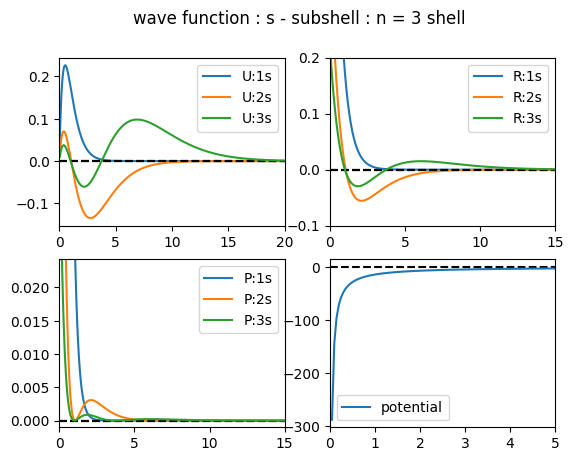

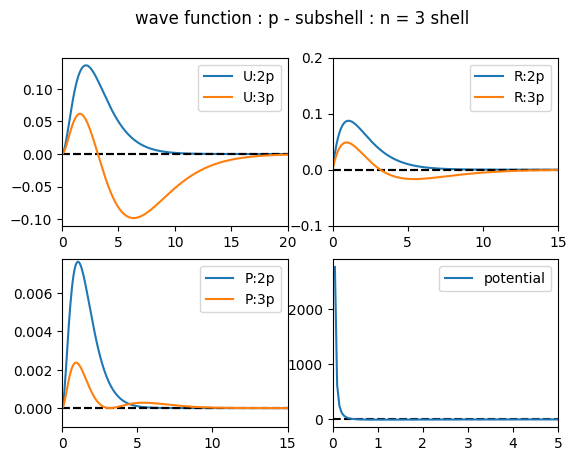

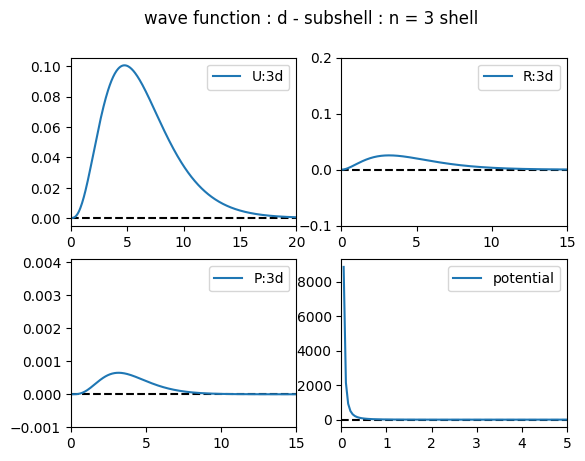

In [19]:
dd1 = np.linspace(d, r_max, n)

subs=["s","p","d","e","f","g"]
for w in range(pn):
    for j in range(pn-w):
        U = (-1)**(j+1)*eveca[w].T[j]
        R_ = U/dd1
        P_d = R_**2
        plt.subplot(2, 2, 1)
        plt.axhline(y=0, c="black", linestyle="dashed")
        plt.plot(dd1, U, label=(f"U:{w+j+1}"+str(subs[w])))
        plt.xlim([0, 20])
        plt.legend(loc="best")
        
        plt.subplot(2, 2, 2)
        plt.axhline(y=0, c="black", linestyle="dashed")
        plt.plot(dd1, R_, label=(f"R:{w+j+1}"+str(subs[w])))
        plt.xlim([0, 15])
        plt.ylim([-0.1,0.2])
        #plt.ylim([-0.1,(w+1)**-2])
        plt.legend(loc="best")
        
        plt.subplot(2, 2, 3)
        plt.axhline(y=0, c="black", linestyle="dashed")
        plt.plot(dd1, P_d, label=(f"P:{w+j+1}"+str(subs[w])))
        plt.xlim([0, 15])
        plt.ylim([-0.001,0.02*(w+0.88)**-1.5])
        plt.legend(loc="best")
        
    plt.subplot(2, 2, 4)
    plt.axhline(y=0, c="black", linestyle="dashed")
    plt.plot(dd1, V(e, dd1,l_(pn)[w]), label="potential")
    plt.xlim([0, 5])
    plt.legend(loc="best")
        
    plt.suptitle(("wave function : "+str(subs[w])+f" - subshell : n = {pn} shell"))
    plt.show()


In [4]:
# plt.plot(dd1,-eveca[2].T[1])
# plt.axhline(linestyle="dashed",color="black")
# plt.xlim(0,100)